In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [2]:
df=pd.read_csv("new_test.csv")
df.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,...,High-Stock-5,Low-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5,Close-Stock-1,Close-Stock-2,Close-Stock-3,Close-Stock-4,Close-Stock-5
0,8/4/2011,484.1,488.90,475.00,481.00,1829606,8.800000e+13,204.90,206.75,199.20,...,1312.8,1281.00,1297.04,1569675,2.040000e+14,NaN,NaN,NaN,NaN,1000
1,8/5/2011,465.0,475.80,457.10,469.56,3156094,1.480000e+14,195.00,198.00,190.50,...,1252.5,1200.00,1229.09,3125692,3.840000e+14,NaN,NaN,NaN,NaN,1000
2,8/8/2011,463.0,480.00,458.05,465.04,4308373,2.000000e+14,193.90,197.80,189.65,...,1265.8,1200.55,1232.93,1660178,2.050000e+14,NaN,NaN,NaN,NaN,1000
3,8/9/2011,450.0,473.55,449.85,460.88,4490924,2.070000e+14,190.25,202.10,190.10,...,1238.3,1180.90,1206.06,3618186,4.360000e+14,NaN,NaN,NaN,NaN,1000
4,8/10/2011,494.8,494.80,473.40,478.06,3267226,1.560000e+14,202.00,202.85,196.00,...,1253.7,1225.30,1242.10,1903396,2.360000e+14,NaN,NaN,NaN,NaN,1000


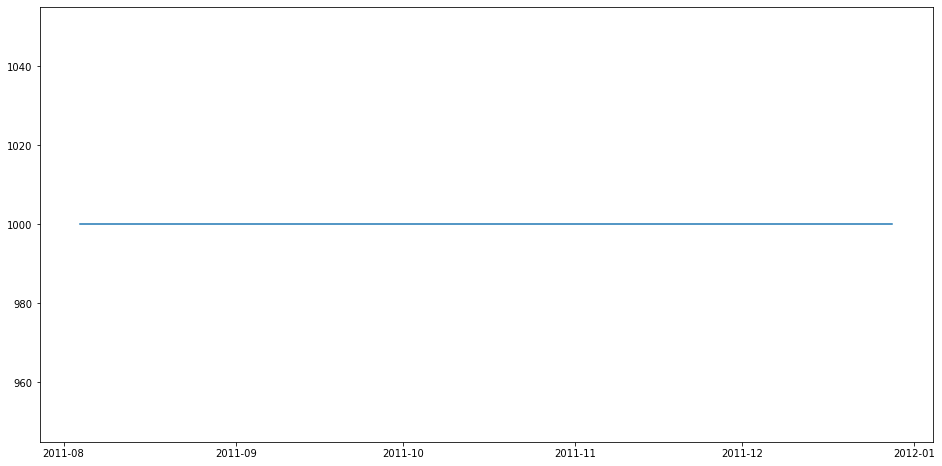

In [3]:
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close-Stock-5"],label='Close Price history')

In [4]:
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [5]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close-Stock-5'])

In [6]:
new_dataset

,Date,Close-Stock-5
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
92,NaN,NaN
93,NaN,NaN
94,NaN,NaN
95,NaN,NaN


In [7]:
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close-Stock-5"][i]=data["Close-Stock-5"][i]

In [8]:
new_dataset

,Date,Close-Stock-5
0,2011-08-04 00:00:00,1000
1,2011-08-05 00:00:00,1000
2,2011-08-08 00:00:00,1000
3,2011-08-09 00:00:00,1000
4,2011-08-10 00:00:00,1000
...,...,...
92,2011-12-22 00:00:00,1000
93,2011-12-23 00:00:00,1000
94,2011-12-26 00:00:00,1000
95,2011-12-27 00:00:00,1000


In [9]:
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

In [10]:
final_dataset=new_dataset.values

In [11]:
train_data=final_dataset[0:97,:]#79%
valid_data=final_dataset[97:,:]

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

In [13]:
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

In [16]:
lstm_model.compile(loss='mean_squared_error',optimizer='Adamax')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

37/37 - 3s - loss: 5.5167e-04


In [17]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

In [18]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

In [19]:
X_test.shape

(0,)

In [20]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

IndexError: tuple index out of range

In [21]:
X_test

array([], dtype=float64)

In [14]:
from keras.models import load_model

In [15]:
lstm_model = load_model('saved_lstm_model.h5')
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [22]:
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

ValueError: Expect x to be a non-empty array or dataset.

In [ ]:
### lstm_model.save("saved_lstm_model.12")

In [ ]:
train_data=new_dataset[:97]
valid_data=new_dataset[97:]
valid_data['Predictions']=closing_price
plt.plot(train_data["Close-Stock-5"])
plt.plot(valid_data[['Close-Stock-5',"Predictions"]])

In [ ]:
closing_price

In [ ]:
predictions= pd.DataFrame(closing_price, columns = ['prediction'])

In [ ]:
predictions.size

In [ ]:
predictions.to_csv (r'C:\Users\MarkCichonski\Learn ML 2021 Grand AI Challenge\resultstt.csv', index = False, header=True)

In [ ]:
#Run #1 1 Epoch Batch Size 1  .0194 .0018 .0098 .0285 .0299 optimizer adam
#Run #2 10 Epoch Batch Size 1 .0020 4.17-4 .0022 .0041 .0065 optimizer adam
#Also tried SGD, RMSprop, adaDelta, adagrad
#Run #3 40 Epoch Batch Size 1  6.00-4 3.21-4 .0016 .0031 .0050 optimizer='Adamax'